In [1]:
import pandas as pd

train = pd.read_csv("train.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train.shape

(614, 13)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# checking for missing values

train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.describe() #descriptive statistics


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.describe(include=[object])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
# dropping PassengerId, Name and Ticket

train = train.drop(['Loan_ID'], axis=1)


In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

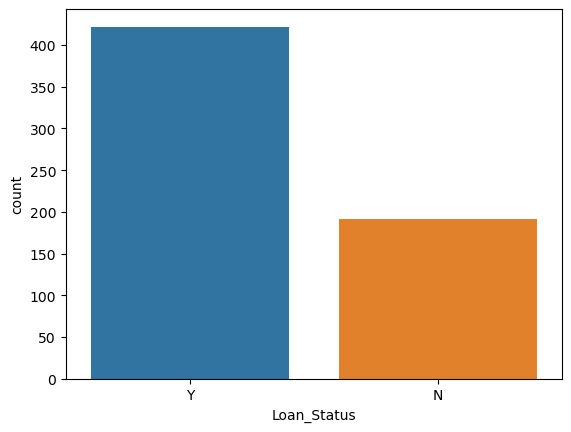

In [13]:
import seaborn as sns
sns.countplot(x=train['Loan_Status'])


In [15]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

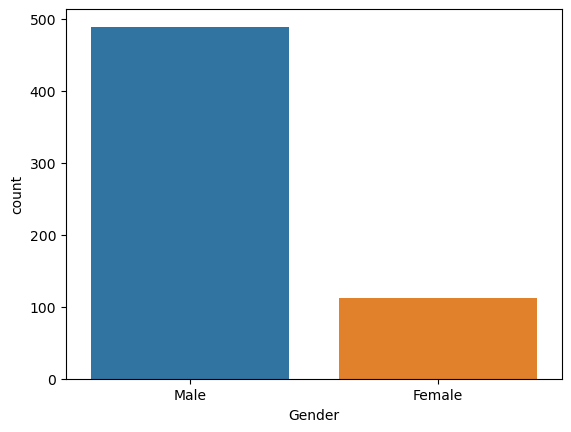

In [16]:
sns.countplot(x=train['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

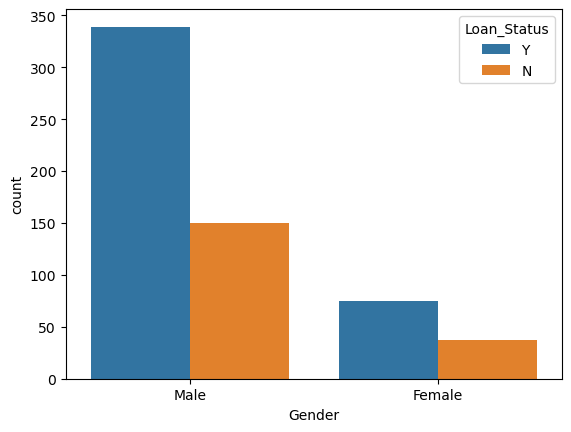

In [17]:
sns.countplot(x=train['Gender'], hue=train['Loan_Status'])



<AxesSubplot:xlabel='Married', ylabel='count'>

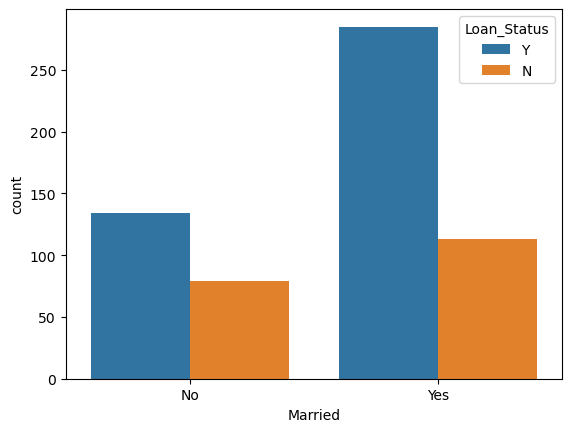

In [18]:
sns.countplot(x='Married', data=train, hue='Loan_Status')





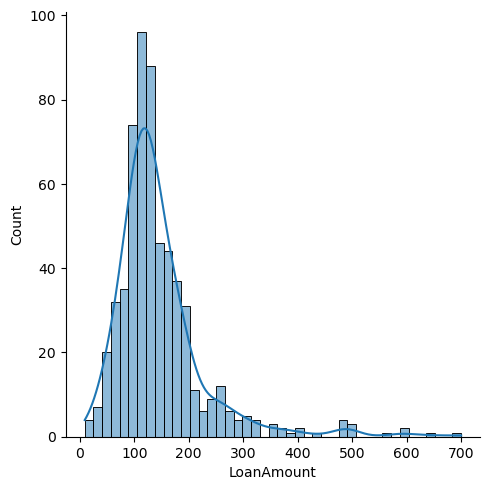

In [19]:
sns.displot(train['LoanAmount'], kde=True)


In [20]:
train['LoanAmount'].skew()


2.677551679256059

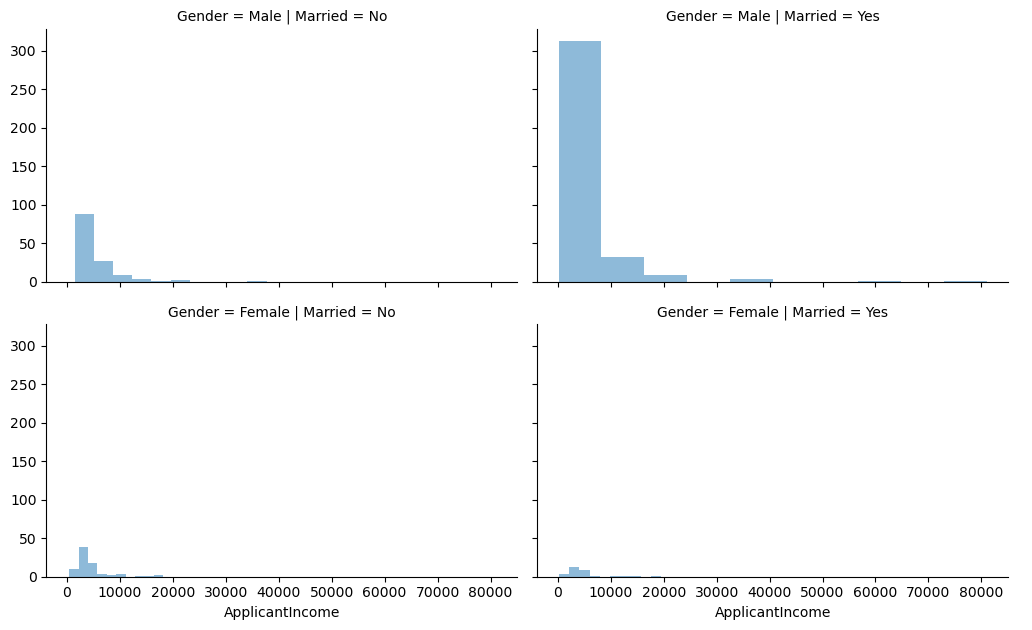

In [21]:
import matplotlib.pyplot as plt

grid = sns.FacetGrid(train, row='Gender', col='Married', height=3.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)

grid.add_legend()

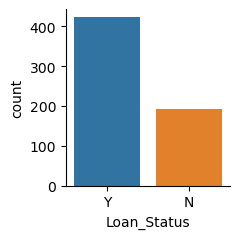

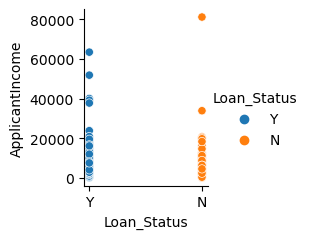

In [28]:
import seaborn as sns

# Corrected count plot
sns.catplot(data=train, x='Loan_Status', kind='count', height=2.5)

# Corrected relational plot
sns.relplot(data=train, x='Loan_Status', y='ApplicantIncome', hue='Loan_Status', height=2.5)


In [29]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [31]:
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [32]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [33]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [35]:
train['Credit_History'].skew()

-1.8823610612186696

In [36]:
train.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

feature_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

le = LabelEncoder()

for col in feature_col:

    train[col] = le.fit_transform(train[col])

In [38]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})

In [39]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [40]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
rel_feat =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 

           'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'total_income','Loan_Status']


In [44]:
train_encoded = train.copy()

# Convert categorical columns to numerical using label encoding
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
train_encoded[categorical_columns] = train_encoded[categorical_columns].apply(lambda x: pd.factorize(x)[0])

# Compute correlation
rel_feat_corr = train_encoded.corr()['Loan_Status']
print(rel_feat_corr)


Gender              -0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Property_Area        0.103253
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


In [45]:
rel_feat_corr

Gender              -0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Property_Area        0.103253
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [48]:
#Separating target variable and other variables

X=train.drop(columns='Loan_Status')

y=train['Loan_Status']






In [49]:
#Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=7)

